In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

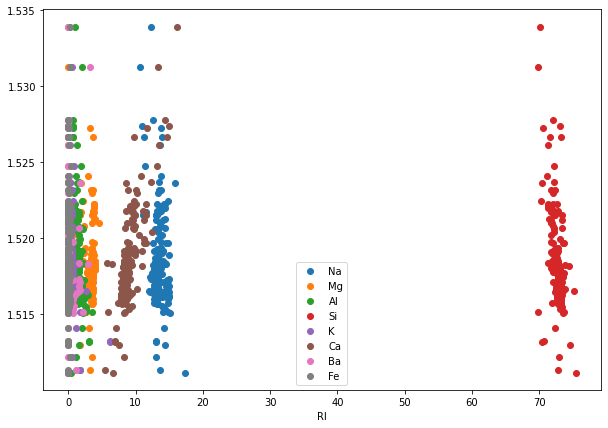

In [15]:
plt.figure(figsize=(10,7))

for column in df.columns[1:9]:
    plt.scatter(df[column],df['RI'],label = str(column))
    plt.xlabel("RI")
    plt.legend()

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
n = NearestNeighbors(n_neighbors = 2)
n_fit = n.fit(df)
distance,_ = n_fit.kneighbors(df)
distance

array([[0.        , 0.88701951],
       [0.        , 0.49264799],
       [0.        , 0.49264799],
       [0.        , 0.30049961],
       [0.        , 0.14933185],
       [0.        , 0.29257488],
       [0.        , 0.14933185],
       [0.        , 0.2412468 ],
       [0.        , 0.58770742],
       [0.        , 0.21863238],
       [0.        , 0.24596754],
       [0.        , 0.12649116],
       [0.        , 0.24596754],
       [0.        , 0.1897367 ],
       [0.        , 0.19339082],
       [0.        , 0.1897367 ],
       [0.        , 0.23065131],
       [0.        , 0.6033242 ],
       [0.        , 0.59489792],
       [0.        , 0.31827664],
       [0.        , 0.31827664],
       [0.        , 0.86296356],
       [0.        , 0.21330781],
       [0.        , 0.12649116],
       [0.        , 0.22249122],
       [0.        , 0.19261454],
       [0.        , 0.23345239],
       [0.        , 0.10630645],
       [0.        , 0.2076054 ],
       [0.        , 0.20273145],
       [0.

In [11]:

distance=np.sort(distance,axis = 0)
distance = distance[:,1]
distance

array([0.        , 0.        , 0.07681148, 0.07681148, 0.1       ,
       0.1       , 0.10630645, 0.10630645, 0.117047  , 0.117047  ,
       0.12649116, 0.12649116, 0.12688585, 0.12688585, 0.14212673,
       0.14212673, 0.14933185, 0.14933185, 0.16156885, 0.16156885,
       0.16278854, 0.17262678, 0.17262678, 0.18439095, 0.18439095,
       0.18466196, 0.18466196, 0.18520356, 0.18520356, 0.1870838 ,
       0.1870838 , 0.1897367 , 0.1897367 , 0.19078969, 0.19261454,
       0.19339082, 0.19339082, 0.19364922, 0.19646934, 0.19646934,
       0.2019901 , 0.20199011, 0.20273145, 0.20664149, 0.2076054 ,
       0.21283802, 0.21330781, 0.21377575, 0.21377575, 0.21863238,
       0.22229966, 0.22229966, 0.22249122, 0.2238303 , 0.2238303 ,
       0.22449951, 0.22449951, 0.22539047, 0.22781738, 0.22781738,
       0.23065131, 0.23216398, 0.23345239, 0.23345241, 0.23409402,
       0.23537306, 0.23600852, 0.23811893, 0.23811893, 0.23916602,
       0.23960912, 0.2412468 , 0.24596754, 0.24596754, 0.24979

Text(0.5, 0, 'Distance')

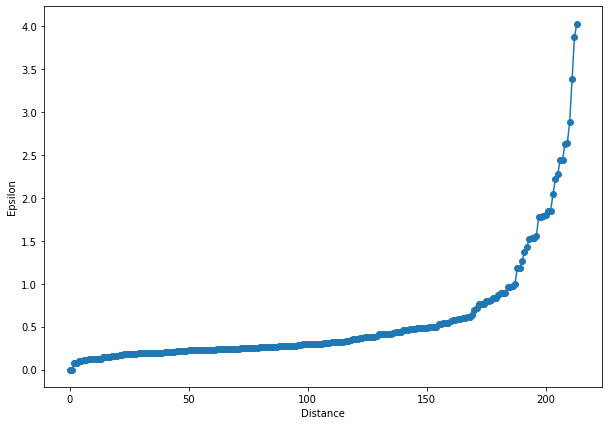

In [14]:
plt.figure(figsize=(10,7))
plt.plot(distance,marker = 'o')
plt.ylabel('Epsilon')
plt.xlabel('Distance')

In [17]:
# epsilon = 1.3,min_sample = 10 + 1 --> dimension + 1 = 11

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
model = DBSCAN(eps = 1.3,min_samples=11)
model.fit(df)
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1], dtype=int64)

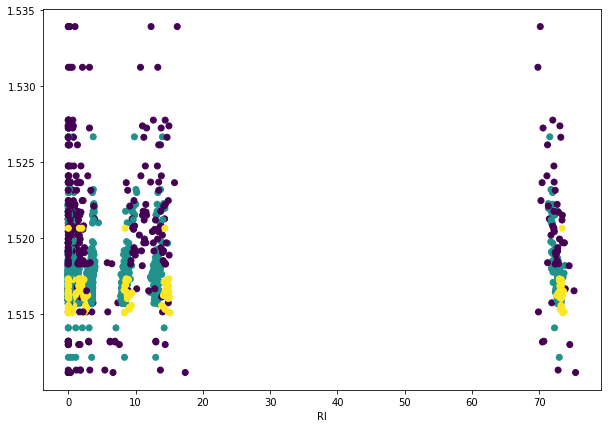

In [26]:
plt.figure(figsize=(10,7))

for column in df.columns[1:9]:
    plt.scatter(df[column],df['RI'],c = model.labels_)
    plt.xlabel("RI")
#     plt.legend()